In [2]:
from generator import fast_sbm, create_connectivity_matrix
from diagonalizer import compute_eigenvalues
from clustering import kmeans_embedding
from sklearn.cluster import KMeans

import numpy as np

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif')

In [4]:
#Main parameters
n = 100 #size of the network
n_clusters = 2
p = 10  # mean apriori degree
eta1, eta2 = 0.6, 0.9

In [5]:
def separation(eta):
    return np.sqrt(2) * ( np.sqrt(eta) - np.sqrt(1-eta) )

def variance(eta, p=10):
    theta = 2*np.sqrt(eta*(1-eta))
    return np.sqrt( 8 * (1+theta**2) / (p*(1+theta)**2) )

def true_center(eta, n):
    norm = np.sqrt(2/n)
    e, f = np.sqrt(eta), np.sqrt(1-eta)
    return norm * np.array([[e,f], [f,e]])

def epsilon(eta, p=10):
    theta = 2*np.sqrt(eta*(1-eta))
    Y = 4 * ( p * (1 + theta) / 4 )**2
    bas = Y * ( Y + p * (theta**2 - 1) )
    haut = (Y - p)**2 - ( theta * p)**2
    return 2 * np.sqrt( 1 - np.sqrt(haut/bas) )

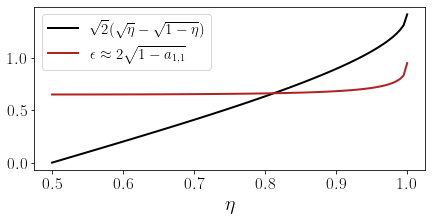

In [6]:
fig, ax = plt.subplots(figsize = (7,3))
eta_list = np.linspace(0.5, 1, 100)
ax.plot(eta_list, separation(eta_list), color='black', linewidth=2, label = r'$\sqrt{2}(\sqrt{\eta} - \sqrt{1-\eta})$')
ax.plot(eta_list, epsilon(eta_list), color='firebrick', linewidth=2, label = r'$\epsilon \approx 2\sqrt{1 - a_{1,1}}$')

ax.set_xlabel(r'$\eta$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=17)
ax.legend(loc=0, fontsize=15)

plt.savefig("graphique_eta.pdf",bbox_inches='tight')


In [10]:
def return_embedding(eta, n=100, p=10):
    F, eigvals_of_F = create_connectivity_matrix(p / 2, p * eta, p * (1 - eta), p / 2)
    A = fast_sbm(n,F=F)
    v = kmeans_embedding(A, n_eigen=1, preprocessing=None, double_sided=True)
    if v[0,0]<=0:
        v[:,0] = -v[:,0]
    if np.dot(v[:,0], v[:,1])<=0:
        v[:,1] = -v[:,1]
    return v

In [11]:
n, eta = 1000, [0.6, 0.9]
true_centers = [true_center(e, n) for e in eta]
embedding = [return_embedding(eta[0], n=n), return_embedding(eta[1], n=n)]
K1 = KMeans(n_clusters=2, random_state=0).fit(embedding[0])
K2 = KMeans(n_clusters=2, random_state=0).fit(embedding[1])
l = [K1.labels_, K2.labels_ ]
c = [K1.cluster_centers_, K2.cluster_centers_]

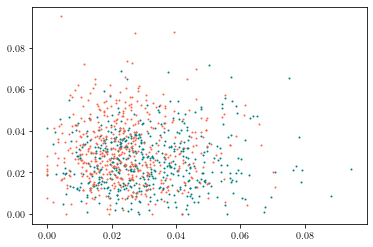

In [12]:
plt.scatter(embedding[1][:, 0][0:n//2], embedding[1][:, 1][0:n//2], color="teal", s=1)
plt.scatter(embedding[1][:, 0][n//2:n], embedding[1][:, 1][n//2:n], color="tomato", s=1)

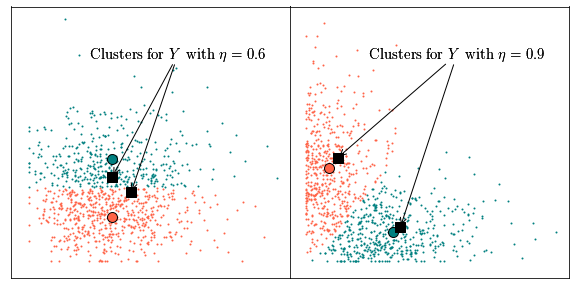

In [157]:
fig, ax = plt.subplots(ncols=2, sharey=True, gridspec_kw={'wspace': 0}, figsize=(10, 5))
color = ['teal', 'tomato']
t=(0.6,0.8)
for i in range(2):
    ax[i].scatter(embedding[i][:,0][l[i]==1], embedding[i][:,1][l[i]==1], color=color[1], s=1)
    ax[i].scatter(embedding[i][:,0][l[i]==0], embedding[i][:,1][l[i]==0], color=color[0], s=1) 
    ax[i].scatter(c[i][0,0], c[i][0,1], color=color[0], edgecolors='k', s=100)
    ax[i].scatter(c[i][1,0], c[i][1,1], color=color[1], edgecolors='k', s=100)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].scatter(true_centers[i][0,0], true_centers[i][0,1], color='k', edgecolors='k', s=100, marker='s')
    ax[i].scatter(true_centers[i][1,0], true_centers[i][1,1], color='k', edgecolors='k', s=100, marker='s')
    ax[i].annotate(r'Clusters for $Y$ with $\eta = {}$'.format(eta[i]), xy=(true_centers[i][1,0], true_centers[i][1,1]), xytext=t, textcoords='axes fraction', ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->'), fontsize=15)
    ax[i].annotate(r'Clusters for $Y$ with $\eta = {}$'.format(eta[i]), xy=(true_centers[i][0,0], true_centers[i][0,1]), xytext=t, textcoords='axes fraction', ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->'), fontsize=15)

plt.savefig("graphique_embedding.pdf",bbox_inches='tight')


494